In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#make sure that the file spectrum_class.py is in the same folder as this file!
import spectrum_class
import os
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

#Pretty matplotlib plotting settings
font = {'family' : 'serif',
        'size'   : 16,}
matplotlib.rc('font', **font)


In [25]:
#define Gaia's filters
gaia_bands = {'R':(6200,9000),
              'B':(4500,6500),
              'G':(4500,8000)}

Below this cell, we will practice reading in a regular spec1d fits file. These spectra have NOT been shifted to rest frame. In most cases, we read in a wavelength ($\lambda$), a flux ($f$), and a measurement of the flux uncertainty ($\sigma$). Specifically, the flux uncertainty, is saying "I am pretty sure that the range $f\pm \sigma$ contains the true measurement." The value we are actually given is the inverse variance, $ivar$, and this is related to the flux uncertainty with $ivar = \frac{1}{\sigma^2}$, so we calculate the uncertainty with $\sigma = \frac{1}{\sqrt{ivar}}.$

In [71]:
start_path = '/Volumes/Kevin_NGVS2/HALO7D/SIP_2020/AST-13/raw_data/'

for starname in os.listdir(start_path):
    if os.path.isdir(f'{start_path}{starname}/'):
        for filename in os.listdir(f'{start_path}{starname}/'):
            if 'spec1d' not in filename:
                continue
            print(filename)

spec1d.07apr2016_GN2a.000.11200.fits.gz
spec1d.07apr2016_GN2b.000.11200.fits.gz
spec1d.08apr2016_GN2a.000.11200.fits.gz
spec1d.08apr2016_GN2b.000.11200.fits.gz
spec1d.09apr2016_GN2a.000.11200.fits.gz
spec1d.09apr2016_GN2b.000.11200.fits.gz
spec1d.03mar2016_GN0a.006.2365.fits.gz
spec1d.03mar2016_GN0b.006.2365.fits.gz
spec1d.03mar2016_GN0c.006.2365.fits.gz
spec1d.03mar2016_GN4b.006.2365.fits.gz
spec1d.04mar2016_GN0a.006.2365.fits.gz
spec1d.04mar2016_GN0b.006.2365.fits.gz
spec1d.04mar2016_GN0c.006.2365.fits.gz
spec1d.04mar2016_GN4b.006.2365.fits.gz
spec1d.05apr2014_GN3C.006.2365.fits.gz
spec1d.05apr2014_GN3D.006.2365.fits.gz
spec1d.07apr2014_GN3C.006.2365.fits.gz
spec1d.07apr2014_GN3D.006.2365.fits.gz
spec1d.07apr2014_GN3e.006.2365.fits.gz
spec1d.07apr2016_GN4b.006.2365.fits.gz
spec1d.08apr2014_GN3C.006.2365.fits.gz
spec1d.08apr2014_GN3D.006.2365.fits.gz
spec1d.08apr2014_GN3e.006.2365.fits.gz
spec1d.08apr2016_GN4b.006.2365.fits.gz
spec1d.09apr2016_GN4b.006.2365.fits.gz
spec1d.14apr2015_GN

In [73]:
#you will need to change the path to be for your computer
path = '/Volumes/Kevin_NGVS2/HALO7D/SIP_2020/AST-15/data/'
filename = 'spec1d.hgc1a.031.G_78270966549760.fits.gz'
starname = 'G_78270966549760'

data = fits.open(f'{path}{filename}')

In [27]:
print(data)
print(len(data))

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1178efc18>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1172d6e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x117e6fa90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1172cb908>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1176636d8>]
5


In [57]:
data[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.4                   
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

In [65]:
data[2].data.names

['SPEC',
 'LAMBDA',
 'IVAR',
 'CRMASK',
 'BITMASK',
 'ORMASK',
 'NBADPIX',
 'INFOMASK',
 'OBJPOS',
 'FWHM',
 'NSIGMA',
 'R1',
 'R2',
 'SKYSPEC',
 'IVARFUDGE']

In [66]:
blue = data[1].data
red = data[2].data

wave_blue, wave_red = blue['lambda'][0],red['lambda'][0]
flux_blue, flux_red = blue['spec'][0],red['spec'][0]
ivar_blue, ivar_red = blue['ivar'][0],red['ivar'][0]
sky_blue, sky_red = blue['skyspec'][0],red['skyspec'][0]

wave = np.append(wave_blue,wave_red)
flux = np.append(flux_blue,flux_red)
ivar = np.append(ivar_blue,ivar_red)
sky = np.append(sky_blue,sky_red)

flux_err = 1/np.sqrt(ivar)

/Users/kevinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


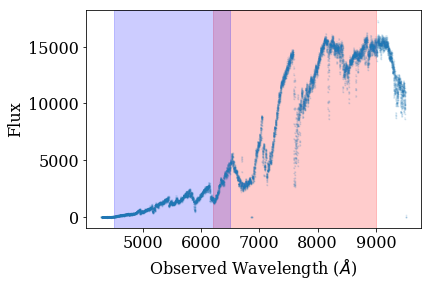

In [67]:
plt.figure()
plt.errorbar(wave,flux,yerr=flux_err,fmt='o',ms=1,alpha=0.1)
plt.ylabel('Flux');plt.xlabel('Observed Wavelength ($\AA$)')

for band in ['R','B']:
    plt.axvspan(gaia_bands[band][0], gaia_bands[band][1], alpha=0.2, color=band.lower())

plt.show()

In [32]:
r_region = (wave >= gaia_bands['R'][0]) & (wave <= gaia_bands['R'][1])
median_r_flux = np.median(flux[r_region])
average_r_flux = np.average(flux[r_region],weights=ivar[r_region])
print('Median R Flux:\t %.2f'%median_r_flux)
print('Average R Flux:\t %.2f'%average_r_flux)

Median R Flux:	 10997.08
Average R Flux:	 6238.83


Below is for reading in spec1d fits files using the spectrum_class.py code (slightly easier).

In [74]:
spec = spectrum_class.Spectrum(f'{path}{filename}')

wave,flux,ivar,sky = spec.lam,spec.flux,spec.ivar,spec.sky
flux_err = 1/np.sqrt(ivar)

/Users/kevinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


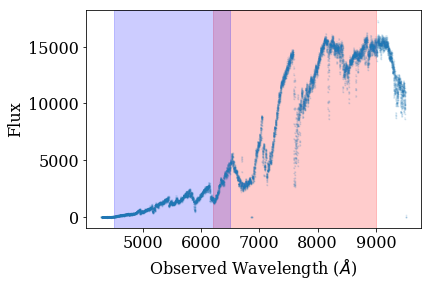

In [75]:
plt.figure()
plt.errorbar(wave,flux,yerr=flux_err,fmt='o',ms=1,alpha=0.1)
plt.ylabel('Flux');plt.xlabel('Observed Wavelength ($\AA$)')

for band in ['R','B']:
    plt.axvspan(gaia_bands[band][0], gaia_bands[band][1], alpha=0.2, color=band.lower())

plt.show()

Below is for reading in generic data from a file (e.g. txt, dat, csv). 

In [83]:
filepath = '/Volumes/Kevin_NGVS2/HALO7D/SIP_2020/AST-15/data/'
filename = 'hgc1a.out'

#filedata = np.genfromtxt(f'{filepath}{filename}',skip_header=7,dtype=None)
#filedata = np.genfromtxt(f'{filepath}{filename}',skip_header=7,dtype=None,
#                        names=['id','ra','dec','epoch','mag','filter','priority','list','select','pa'])
filedata = np.genfromtxt(f'{filepath}{filename}',skip_header=7,
                         dtype=['U16','U16','U16','<f8','<f8','U16',    '<i8',    '<i8', '<i8',   'U16'],
                         names=['id','ra','dec','epoch','mag','filter','priority','list','select','pa'])
filedata

array([('G_65084863834752', '10:01:56.932', '+02:30:29.53', 2000., 19.785, 'G', 900, 1, 1, 'INDEF'),
       ('G_65806418340608', '10:02:15.611', '+02:30:35.81', 2000., 18.056, 'G', 900, 1, 1, 'INDEF'),
       ('G_65741993950848', '10:02:06.596', '+02:29:38.10', 2000., 20.177, 'G', 900, 1, 1, 'INDEF'),
       ('G_65016144356864', '10:01:58.554', '+02:29:57.06', 2000., 18.965, 'G', 900, 1, 1, 'INDEF'),
       ('G_64844345661312', '10:01:54.757', '+02:28:20.45', 2000., 19.436, 'G', 900, 1, 1, 'INDEF'),
       ('G_66841505413120', '10:01:55.590', '+02:31:58.84', 2000., 20.668, 'G', 900, 1, 1, 'INDEF'),
       ('G_68147175629184', '10:01:42.788', '+02:30:26.19', 2000., 18.489, 'G', 900, 1, 1, 'INDEF'),
       ('G_68284614581632', '10:01:48.302', '+02:31:32.37', 2000., 19.901, 'G', 900, 1, 1, 'INDEF'),
       ('G_65222304081792', '10:01:46.340', '+02:30:41.26', 2000., 20.802, 'G', 900, 1, 1, 'INDEF'),
       ('G_65703339124992', '10:02:10.719', '+02:30:26.19', 2000., 19.155, 'G', 900, 1, 1, 

In [85]:
filedata['ra']

array(['10:01:56.932', '10:02:15.611', '10:02:06.596', '10:01:58.554',
       '10:01:54.757', '10:01:55.590', '10:01:42.788', '10:01:48.302',
       '10:01:46.340', '10:02:10.719', '10:02:17.417', '10:02:06.795',
       '10:02:03.207', '10:02:08.082', '10:01:45.873', '10:01:55.320',
       '10:01:48.126', '10:01:43.309', '10:01:41.234', '10:01:59.782',
       '10:02:03.203', '10:01:45.334', '10:01:48.046', '10:02:08.986',
       '10:01:51.190', '10:01:56.784', '10:02:07.012', '10:01:52.024',
       '10:02:27.716', '10:02:21.899', '10:02:37.577', '10:02:26.999',
       '10:02:34.612', '10:02:36.570', '10:02:22.276', '10:02:27.563',
       '10:02:28.389', '10:02:31.725', '10:02:32.288', '10:02:15.789',
       '10:02:21.008', '10:02:30.333', '10:02:37.174', '10:02:19.920',
       '10:02:17.006', '10:02:43.306', '10:02:38.953', '10:02:31.615',
       '10:02:03.184', '10:02:07.085', '10:01:48.376', '10:01:45.200',
       '10:01:43.210', '10:02:02.688', '10:02:30.184', '10:02:27.475',
      

In [86]:
coords = SkyCoord(filedata['ra'], filedata['dec'], unit=(u.hourangle, u.deg), frame="icrs")

In [39]:
coords.ra

<Longitude [150.48721667, 150.56504583, 150.52748333, 150.493975  ,
            150.47815417, 150.481625  , 150.42828333, 150.45125833,
            150.44308333, 150.5446625 , 150.57257083, 150.5283125 ,
            150.5133625 , 150.533675  , 150.4411375 , 150.4805    ,
            150.450525  , 150.43045417, 150.42180833, 150.49909167,
            150.51334583, 150.43889167, 150.45019167, 150.53744167,
            150.46329167, 150.4866    , 150.52921667, 150.46676667,
            150.61548333, 150.59124583, 150.65657083, 150.61249583,
            150.64421667, 150.652375  , 150.59281667, 150.61484583,
            150.6182875 , 150.6321875 , 150.63453333, 150.5657875 ,
            150.58753333, 150.6263875 , 150.65489167, 150.583     ,
            150.57085833, 150.68044167, 150.66230417, 150.63172917,
            150.51326667, 150.52952083, 150.45156667, 150.43833333,
            150.43004167, 150.5112    , 150.62576667, 150.61447917,
            150.59644583] deg>

In [87]:
ra,dec = coords.ra.value,coords.dec.value
print(ra)
print(dec)

[150.48721667 150.56504583 150.52748333 150.493975   150.47815417
 150.481625   150.42828333 150.45125833 150.44308333 150.5446625
 150.57257083 150.5283125  150.5133625  150.533675   150.4411375
 150.4805     150.450525   150.43045417 150.42180833 150.49909167
 150.51334583 150.43889167 150.45019167 150.53744167 150.46329167
 150.4866     150.52921667 150.46676667 150.61548333 150.59124583
 150.65657083 150.61249583 150.64421667 150.652375   150.59281667
 150.61484583 150.6182875  150.6321875  150.63453333 150.5657875
 150.58753333 150.6263875  150.65489167 150.583      150.57085833
 150.68044167 150.66230417 150.63172917 150.51326667 150.52952083
 150.45156667 150.43833333 150.43004167 150.5112     150.62576667
 150.61447917 150.59644583]
[2.50820278 2.50994722 2.49391667 2.49918333 2.47234722 2.53301111
 2.507275   2.52565833 2.51146111 2.507275   2.49993056 2.53326667
 2.52215556 2.52725833 2.56976111 2.52283611 2.51400556 2.52909722
 2.53711667 2.54649722 2.52893333 2.53896944 2.5

In [90]:
filedata[filedata['id'] == starname]

array([('G_78270966549760', '10:02:26.999', '+02:29:37.14', 2000., 18.536, 'G', 900, 1, 1, 'INDEF')],
      dtype=[('id', '<U16'), ('ra', '<U16'), ('dec', '<U16'), ('epoch', '<f8'), ('mag', '<f8'), ('filter', '<U16'), ('priority', '<i8'), ('list', '<i8'), ('select', '<i8'), ('pa', '<U16')])

In [91]:
phot_path = '/Volumes/Kevin_NGVS2/HALO7D/SIP_2020/AST-15/data/'
phot_file = 'HALO7D_Gaia_possible_targets_photometry.dat'

phot_data = np.genfromtxt(f'{phot_path}{phot_file}',skip_header=1,
                          dtype=['U16','U16','U16','<f8','<f8','<f8'],
                          names=['id', 'ra', 'dec','G',  'B',  'R'])

In [92]:
phot_data[phot_data['id'] == starname]

array([('G_78270966549760', '10:02:26.999', '+02:29:37.14', 18.53636, 20.03314, 17.25082)],
      dtype=[('id', '<U16'), ('ra', '<U16'), ('dec', '<U16'), ('G', '<f8'), ('B', '<f8'), ('R', '<f8')])